In [2]:
import torch 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
words =  open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [115]:
block_size = 3  # How many characters do we take to predict the next character 
X, Y = [], []  # X = Input to NN, Y = Labels 
for w in words: 
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [11]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [168]:
def build_dataset(words):
    block_size = 3  # How many characters do we take to predict the next character 
    X, Y = [], []  # X = Input to NN, Y = Labels 
    for w in words: 
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '----->', itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y 
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
len(words)

In [169]:
n1, n2

(25626, 28829)

In [14]:
C = torch.randn((27,2))

In [23]:
C[torch.tensor([5,6,7])]

tensor([[ 0.6496,  0.1721],
        [ 1.6184, -0.2412],
        [-1.7585, -0.2177]])

In [22]:
C.shape 

torch.Size([27, 2])

In [21]:
F.one_hot(torch.tensor(5), num_classes= 27).float() @ C  

tensor([0.6496, 0.1721])

In [26]:
embeding = C[X]
embeding.shape

torch.Size([32, 3, 2])

In [27]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
emb @ W  + b1 

In [32]:
torch.cat( [embeding[:, 0, :],embeding[:, 1, :],embeding[:, 2, :]],1  ).shape

torch.Size([32, 6])

In [36]:
torch.cat (torch.unbind(embeding, 1),1).shape

torch.Size([32, 6])

In [37]:
a = torch.arange(18)

In [38]:
a.shape

torch.Size([18])

In [41]:
a.view() # Same as reshape in tensorflow 

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [43]:
embeding.shape 

torch.Size([32, 3, 2])

In [45]:
embeding.view(32, 6) == torch.cat (torch.unbind(embeding, 1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [94]:
h = (embeding.view(embeding.shape[0], 6) @ W1) + b1

In [95]:
h.shape

torch.Size([32, 100])

In [96]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [97]:
logits = h @ W2 + b2

In [98]:
logits.shape

torch.Size([32, 27])

In [99]:
counts = logits.exp()
counts

tensor([[1.2058e+20, 3.1163e-18, 2.6955e-03, 3.0135e+01, 1.2401e-16, 3.4411e+12,
         4.1977e+22, 1.2717e+07, 4.7389e+13, 8.9798e-06, 2.2298e-06, 2.5564e-02,
         2.1431e-03, 3.2386e+38, 1.1356e+18, 1.0096e-08, 1.1641e-32, 8.2931e-38,
         7.5542e-03, 2.0470e-10, 1.9841e-01, 4.2991e-05, 1.1157e-12, 3.2830e-27,
         3.4026e-13, 2.6201e+29, 1.1051e+01],
        [3.4192e-05, 6.5765e-10, 1.2730e+14, 1.2654e+11, 5.0051e-28, 2.3790e+18,
         5.6350e+05, 1.6899e+08, 5.3361e+10, 1.7316e+11, 3.6943e-14, 7.1729e+05,
         6.1673e+02, 5.2571e+16, 1.8858e+08, 1.2736e-08, 8.2821e-12, 1.6042e-22,
         1.4928e-08, 4.9357e-06, 2.6509e+03, 8.5498e-02, 7.9652e-11, 1.0672e-20,
         7.9682e-17, 2.0924e+13, 3.3758e-07],
        [2.0928e+06, 6.1247e-04, 3.7171e+07, 6.2541e+04, 1.7008e-05, 9.1180e+03,
         2.4696e+00, 2.9751e+08, 6.1524e+06, 3.3858e+05, 4.8809e-11, 2.0741e+05,
         2.7019e-07, 3.1956e+15, 2.9708e-06, 3.2491e-20, 1.6254e-03, 1.1360e-09,
         4.2861e-

In [100]:
prob = counts /counts.sum(1, keepdims = True)
prob

tensor([[3.7231e-19, 0.0000e+00, 8.3237e-42, 9.3048e-38, 0.0000e+00, 1.0625e-26,
         1.2962e-16, 3.9269e-32, 1.4633e-25, 2.8026e-44, 7.0065e-45, 7.8937e-41,
         6.6169e-42, 1.0000e+00, 3.5063e-21, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         2.3326e-41, 0.0000e+00, 6.1264e-40, 1.3312e-43, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 8.0902e-10, 3.4123e-38],
        [1.4061e-23, 2.7045e-28, 5.2351e-05, 5.2037e-08, 0.0000e+00, 9.7832e-01,
         2.3173e-13, 6.9493e-11, 2.1944e-08, 7.1209e-08, 1.5192e-32, 2.9497e-13,
         2.5362e-16, 2.1619e-02, 7.7551e-11, 5.2372e-27, 3.4058e-30, 6.5970e-41,
         6.1390e-27, 2.0297e-24, 1.0901e-15, 3.5159e-20, 3.2755e-29, 4.3886e-39,
         3.2768e-35, 8.6045e-06, 1.3882e-25],
        [3.4478e-10, 1.0090e-19, 6.1238e-09, 1.0303e-11, 2.8020e-21, 1.5021e-12,
         4.0686e-16, 4.9014e-08, 1.0136e-09, 5.5780e-11, 8.0411e-27, 3.4169e-11,
         4.4512e-23, 5.2646e-01, 4.8942e-22, 5.3528e-36, 2.6777e-19, 1.8714e-25,
         7.0612e-

In [88]:
prob.shape

torch.Size([32, 27])

In [101]:
loss = prob[torch.arange(32), Y]
loss

tensor([1.0625e-26, 2.1619e-02, 5.2646e-01, 4.7526e-06, 1.6123e-11, 0.0000e+00,
        9.6870e-23, 3.6656e-04, 5.5157e-08, 1.8939e-09, 3.7854e-03, 4.8490e-10,
        0.0000e+00, 2.4120e-34, 4.8985e-15, 4.9746e-17, 2.8026e-44, 5.8968e-32,
        1.5922e-18, 9.9380e-10, 8.6432e-21, 1.3166e-15, 2.9239e-15, 2.0764e-10,
        1.2786e-08, 0.0000e+00, 9.1045e-30, 3.4504e-08, 3.5398e-04, 1.0656e-11,
        9.7945e-13, 1.3571e-14])

In [65]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [74]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [102]:
loss = -prob[torch.arange(32), Y].log().mean()

In [103]:
loss

tensor(inf)

In [92]:
#Lets make it more respectable 

In [93]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [205]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30,200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200,27), generator =g ) 
b2 = torch.randn(27, generator = g )
parameters = [C, W1, b1, W2,b2]

In [206]:
sum(p.nelement() for p in parameters)

11897

In [185]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [208]:
for p in parameters:
    p.requires_grad = True 

In [219]:
lri = [] 
lossi = [] 
step = []
for i in range (200000):
    
    #minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32,)) 
    
    #forward pas 
    emb  = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item() )
    
    #backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    lr = 0.1 if i<100000 else 0.01
    for p in parameters:
        p.data+= -lr* p.grad 
        
    #Tracking the stats 
    step.append(i)
   # lri.append(lre[i])
    lossi.append(loss.log10().item())

print(loss.item())

2.3614184856414795


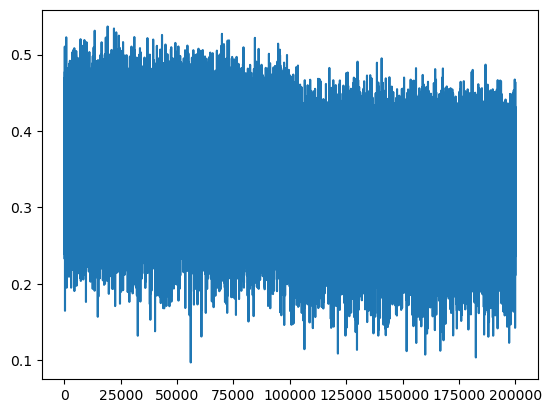

In [220]:
plt.plot(step, lossi)

In [176]:
#torch.randint(0, X.shape[0], (32,))

In [221]:
emb  = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1433, grad_fn=<NllLossBackward0>)

In [222]:
emb  = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0946, grad_fn=<NllLossBackward0>)

In [ ]:
#Training split, dev/validation split, test split 
#80 , 10, 10 

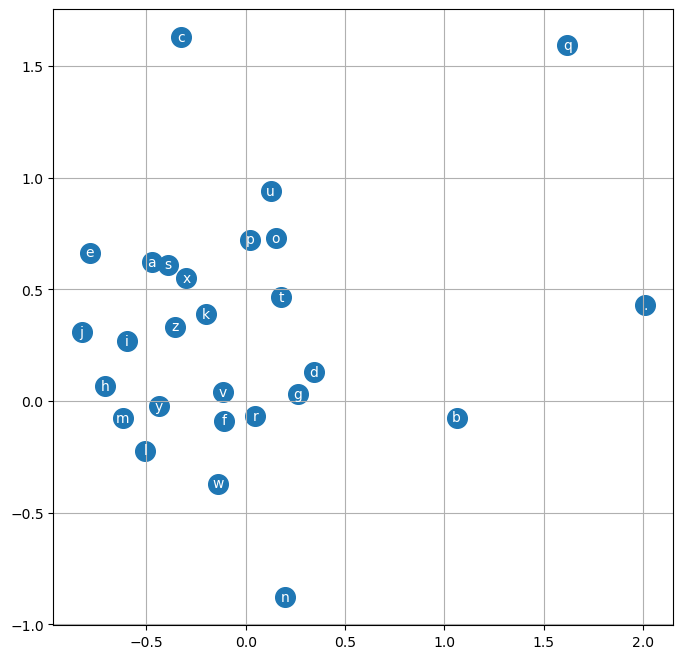

In [223]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [226]:
#Sampling from the model
g = torch.Generator().manual_seed(2147483647 + 10 )
for _ in range(20):
    out = [] 
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2 
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator = g).item()
        context = context[1:]+[ix]
        out.append(ix)
        if(ix == 0):
            break 
    print(''.join(itos[i] for i in out))

mora.
mayah.
seel.
nduryal.
rethrus.
jerne.
caileed.
elin.
shy.
jen.
edelieson.
arleilyn.
hokelin.
shub.
rishiriel.
kendreelynn.
nopolon.
brey.
der.
yarleyel.
